<table><tr><th>
<div align="center" > 
    <div style="margin: 0 auto; display: inline-block">    
    <h1 align="center">Introduction to Python</h1>
    <h2 align="center">Pandas - Basic Operations</h2>
    <h3 align="center">Matthew Hielsberg</h3>
    <h3 align="center" style='color: #500000; font-family: open-sans; text-decoration: none;'><a style='color: #500000; font-family: open-sans; text-decoration: none;' href="https://www.math.tamu.edu">Department of Mathematics</a> &amp; <a style='color: #500000; font-family: open-sans; text-decoration: none;'  href="https://tamids.tamu.edu/">Institute of Data Science</a></h3>
</div>
</th>
<th>   
<div style="width:250px; display: inline-block;">
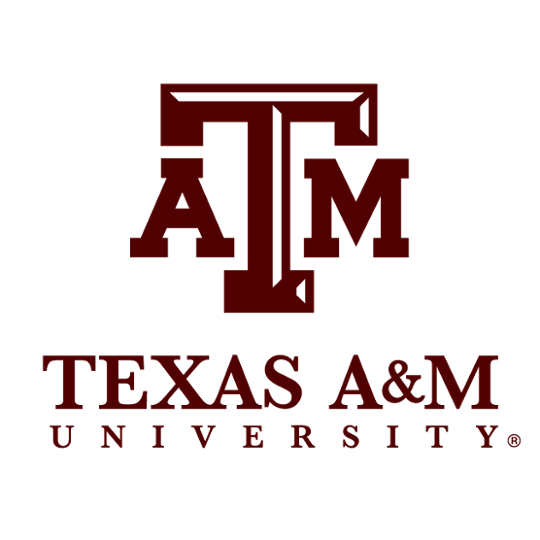 
    </div>
</div>
</th></tr></table>

## Basic Operations

Pandas supports some basic operations, including many mathematical operators, transpose, sorting and many others.  See the [`Series`](https://pandas.pydata.org/pandas-docs/stable/reference/series.html) and [`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) references for a full listing.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame(np.random.randn(6, 4), 
                  index=pd.date_range('20130101', periods=6),
                  columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.763441,-2.251760,0.677432,-0.381745
2013-01-02,-0.442068,0.502659,-0.787058,-0.252933
2013-01-03,0.098333,-0.149126,-0.095952,0.205429
2013-01-04,0.702428,-0.627040,1.655533,0.550858
2013-01-05,0.383838,0.998171,0.477051,-1.107236
2013-01-06,-0.754378,-1.035564,-1.198076,-0.337223


### Transpose

The method [DataFrame.T](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.T.html) reflects the DataFrame over its main diagonal (similar to Numpy's [ndarray.T](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.T.html)).

In [3]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.763441,-0.442068,0.098333,0.702428,0.383838,-0.754378
B,-2.251760,0.502659,-0.149126,-0.627040,0.998171,-1.035564
C,0.677432,-0.787058,-0.095952,1.655533,0.477051,-1.198076
D,-0.381745,-0.252933,0.205429,0.550858,-1.107236,-0.337223


### Sort Indices

The [DataFrame.sort_index](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_index.html#pandas.DataFrame.sort_index) returns a new DataFrame sorted by label.  If the inplace argument is True then the sort is applied to the original DataFrame and the method returns None.

In [4]:
# sort columns by label in descending order
df.sort_index(axis=1, ascending=False) 

,D,C,B,A
2013-01-01,-0.381745,0.677432,-2.251760,-0.763441
2013-01-02,-0.252933,-0.787058,0.502659,-0.442068
2013-01-03,0.205429,-0.095952,-0.149126,0.098333
2013-01-04,0.550858,1.655533,-0.627040,0.702428
2013-01-05,-1.107236,0.477051,0.998171,0.383838
2013-01-06,-0.337223,-1.198076,-1.035564,-0.754378


### Sort Values

The [DataFrame.sort_values](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html) returns a new DataFrame with values sorted along either row(s) or column(s).

In [5]:
# sort rows by the values in column B in ascending order
df.sort_values(by='B')

,A,B,C,D
2013-01-01,-0.763441,-2.251760,0.677432,-0.381745
2013-01-06,-0.754378,-1.035564,-1.198076,-0.337223
2013-01-04,0.702428,-0.627040,1.655533,0.550858
2013-01-03,0.098333,-0.149126,-0.095952,0.205429
2013-01-02,-0.442068,0.502659,-0.787058,-0.252933
2013-01-05,0.383838,0.998171,0.477051,-1.107236


### Drop Duplicates

The [Series.drop_duplicates](https://pandas.pydata.org/docs/reference/api/pandas.Series.drop_duplicates.html) and [DataFrame.drop_duplicates](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html) returns the Series or DataFrame with duplicate rows removed.

In [6]:
s = pd.Series(5, index=['A', 'Z', 'G', 'D', 'C', 'F'])
s

A    5
Z    5
G    5
D    5
C    5
F    5
dtype: int64

In [7]:
s.drop_duplicates(keep='first')

A    5
dtype: int64

### Drop NaN

It may be that the source of data for your Series or DataFrame does not have complete information and there are missing data.  Missing data is typically marked with NaN.  The [`dropna`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) method can be used to remove those rows or columns with missing data.

In [8]:
s = pd.Series(['A', 'Z', np.NaN, 'D', 'C', 'F'])
s

0      A
1      Z
2    NaN
3      D
4      C
5      F
dtype: object

In [9]:
# Check the documentation for additional options on how NaN is removed.
s.dropna(how='any', inplace=True)
s

0    A
1    Z
3    D
4    C
5    F
dtype: object

### Additional Operations

There are a number of additional operations that can be performed on Series' and DataFrames. Some examples include:

- [count](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html): Returns the number of non-NA cells for each column or row.
- [cov](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cov.html): Compute the pairwise covariance of columns.
- [max](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.max.html): Return the maximum of the values over the requested axis.
- [mean](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html): Return the mean of the values over the requested axis.
- [median](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.median.html): Return the median of the values over the requested axis.
- [quantile](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html): Return values at the given quantile over requested axis.
- and many others.


For example, the [`mean`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) function returns the mean of the values for the requested axis.

In [10]:
df

,A,B,C,D
2013-01-01,-0.763441,-2.251760,0.677432,-0.381745
2013-01-02,-0.442068,0.502659,-0.787058,-0.252933
2013-01-03,0.098333,-0.149126,-0.095952,0.205429
2013-01-04,0.702428,-0.627040,1.655533,0.550858
2013-01-05,0.383838,0.998171,0.477051,-1.107236
2013-01-06,-0.754378,-1.035564,-1.198076,-0.337223


In [11]:
df.mean() # column-based means

A   -0.129214
B   -0.427110
C    0.121488
D   -0.220475
dtype: float64

In [12]:
df.mean(axis=1) # row-based means

2013-01-01   -0.679878
2013-01-02   -0.244850
2013-01-03    0.014671
2013-01-04    0.570445
2013-01-05    0.187956
2013-01-06   -0.831310
Freq: D, dtype: float64

In [13]:
df.values.mean() # use NumPy mean to get the table mean

-0.1638277150618381

In [14]:
df.stack().mean() # stack all columns then get table mean

-0.1638277150618381

In [15]:
df.mean(axis=0).mean() # table mean

-0.1638277150618381

## Slicing, Filtering and Selection

Slicing DataFrames and Series is not quite the same as with lists or ndarray, in that both named and unnamed indices may be used.  However, there are some additional differences that will be pointed out below.

In [2]:
data = [1, 3, 5, np.nan, 6, 8]
s = pd.Series(data)
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Sereis may be sliced similarlly to Python lists.

In [3]:
s[0:3] # access/slice using the integer indices as with Python lists

0    1.0
1    3.0
2    5.0
dtype: float64

If labels are added to the series then they may also be used to slice the data.

In [4]:
labels = ['A', 'Z', 'G', 'D', 'C', 'F']
s2 = pd.Series(data, index=labels)
s2

A    1.0
Z    3.0
G    5.0
D    NaN
C    6.0
F    8.0
dtype: float64

Notice the stop value is given as 'C', and yet it still appears in the output.  This is a difference from numeric indices.

In [5]:
s2['A':'C'] # access/slice using the passed indices

A    1.0
Z    3.0
G    5.0
D    NaN
C    6.0
dtype: float64

The slice below using numeric indices that correspond to the labels in the previous example, but notice that the stop value is not included in the output here.

In [6]:
s2[0:4] # integer indices may still be used 

A    1.0
Z    3.0
G    5.0
D    NaN
dtype: float64

With Series a single label may be used to index a value.

In [7]:
s2['A']

1.0

In [8]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), 
                  index=dates,
                  columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,2.038378,-0.113860,1.338105,-0.994651
2013-01-02,0.022264,-0.792728,1.153042,0.287931
2013-01-03,-0.632783,-1.462099,0.982946,0.454851
2013-01-04,0.255914,-0.339315,-0.725900,1.756524
2013-01-05,-0.373219,-0.023308,0.071631,1.327775
2013-01-06,-1.433958,2.693109,0.463924,-1.508217


The columns of DataFrames can be indexed using labels.

In [9]:
df['A'] # Access column A from df

2013-01-01    2.038378
2013-01-02    0.022264
2013-01-03   -0.632783
2013-01-04    0.255914
2013-01-05   -0.373219
2013-01-06   -1.433958
Freq: D, Name: A, dtype: float64

However, row labels may not be used for DataFrames the same way as they were for Series.  Note here the format of the date can be in several forms and still be a valid date matching our labels.  

In [10]:
df['2013-01-01']  

KeyError: '2013-01-01'

While indexing of rows with this syntax is not allowed, slicing rows does work with both indices and labels.  Note that with indices the stop index is not included just like with Python lists, but with labels the *stop index* is included.


In [11]:
df[:2]

,A,B,C,D
2013-01-01,2.038378,-0.113860,1.338105,-0.994651
2013-01-02,0.022264,-0.792728,1.153042,0.287931


In [12]:
df[1:-1]

,A,B,C,D
2013-01-02,0.022264,-0.792728,1.153042,0.287931
2013-01-03,-0.632783,-1.462099,0.982946,0.454851
2013-01-04,0.255914,-0.339315,-0.725900,1.756524
2013-01-05,-0.373219,-0.023308,0.071631,1.327775


In [13]:
df['2013-01-02':'20130104'] # dashes are optional in the dates

,A,B,C,D
2013-01-02,0.022264,-0.792728,1.153042,0.287931
2013-01-03,-0.632783,-1.462099,0.982946,0.454851
2013-01-04,0.255914,-0.339315,-0.725900,1.756524


The use of column labels in a slice is not permitted with this syntax.

In [14]:
df['A':'C']

ValueError: Given date string not likely a datetime.

In DataFrames using square bracket notation allows for columns to be indexed and rows to be sliced, but not vice versa.  For Series, since they are 1D data structures, both indexing and slicing using square brackets is allowed.  To provide a more uniform means of indexing and slicing the [`DataFrame.loc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) and [`DataFrame.iloc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html) properties can be used.

The [`DataFrame.loc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) property may be used to access a group of rows and columns by label(s) or boolean array. [`DataFrame.iloc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html) is similar but uses indices rather than labels.

To use these properties we must specify `loc` or `iloc` followed by square brackets, and inside the brackets we have a few options.  For example to access a single row we can use `loc` with a row label.

In [15]:
df.loc[dates[0]]  # index to get the first row

A    2.038378
B   -0.113860
C    1.338105
D   -0.994651
Name: 2013-01-01 00:00:00, dtype: float64

To perform a slice capturing multiple rows we can use the labels with the typical slice syntax after `loc`.  Notice here that we specify the dates with different formats and this still works as expected.  For readability, you should of course be consistent and choose a format that helps to express the purpose of the value or improve readability.

In [16]:
df.loc['20130102':'2013-01-04']

,A,B,C,D
2013-01-02,0.022264,-0.792728,1.153042,0.287931
2013-01-03,-0.632783,-1.462099,0.982946,0.454851
2013-01-04,0.255914,-0.339315,-0.725900,1.756524


With `loc` and `iloc` we can specify both row and column labels separated by a comma to index or slice. 

In [17]:
df.loc['20130102', 'A']

0.02226351762912665

In [18]:
df.loc['20130102':'20130104', 'A':'B']

,A,B
2013-01-02,0.022264,-0.792728
2013-01-03,-0.632783,-1.462099
2013-01-04,0.255914,-0.339315


We can use `:` to specify a slice return all rows, for example, and even give a list of column labels as follows:

In [19]:
df.loc[:, ['A', 'B']]  

,A,B
2013-01-01,2.038378,-0.113860
2013-01-02,0.022264,-0.792728
2013-01-03,-0.632783,-1.462099
2013-01-04,0.255914,-0.339315
2013-01-05,-0.373219,-0.023308
2013-01-06,-1.433958,2.693109


You may also use the values from a single column to select data with boolean indexing.

In [20]:
condition = df['A'] > 0
condition

2013-01-01     True
2013-01-02     True
2013-01-03    False
2013-01-04     True
2013-01-05    False
2013-01-06    False
Freq: D, Name: A, dtype: bool

For row indexing this works with and without `loc`.

In [21]:
df[condition]

,A,B,C,D
2013-01-01,2.038378,-0.113860,1.338105,-0.994651
2013-01-02,0.022264,-0.792728,1.153042,0.287931
2013-01-04,0.255914,-0.339315,-0.725900,1.756524


In [22]:
df.loc[condition]

,A,B,C,D
2013-01-01,2.038378,-0.113860,1.338105,-0.994651
2013-01-02,0.022264,-0.792728,1.153042,0.287931
2013-01-04,0.255914,-0.339315,-0.725900,1.756524


Multiple conditions may be used and combined.  The following uses a condition on column A and a slice that returns only columns C and D.

In [23]:
df.loc[(df['A'] > 0) & (df['A'] < 1), ['C', 'D']]

,C,D
2013-01-02,1.153042,0.287931
2013-01-04,-0.725900,1.756524


Boolean indexing can also be used to select values from a DataFrame that meet some condition.  For example, we can select all of the values that are strictly larger than zero in our DataFrame as follows:

In [24]:
df[df > 0]

,A,B,C,D
2013-01-01,2.038378,NaN,1.338105,NaN
2013-01-02,0.022264,NaN,1.153042,0.287931
2013-01-03,NaN,NaN,0.982946,0.454851
2013-01-04,0.255914,NaN,NaN,1.756524
2013-01-05,NaN,NaN,0.071631,1.327775
2013-01-06,NaN,2.693109,0.463924,NaN


MIT License

Copyright (c) 2022 Department of Mathematics, Texas A&M University

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and
associated documentation files (the "Software"), to deal in the Software without restriction, including
without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of
the Software, and to permit persons to whom the Software is furnished to do so, subject to the following
conditions:
The above copyright notice and this permission notice shall be included in all copies or substantial portions
of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS
FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR
COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN
AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION
WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.